# Can We Predict the Stock Price Movement in the Future?
YOu can read the article explaining how LSTM works [here](https://web.stanford.edu/class/cs379c/archive/2018/class_messages_listing/content/Artificial_Neural_Network_Technology_Tutorials/OlahLSTM-NEURAL-NETWORK-TUTORIAL-15.pdf)

## Is the stock a random walk?

## Long Short Term Memory 



1. Import the libraries

In [1]:
!pip install --upgrade pandas

In [2]:
!pip install --upgrade pandas-datareader

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


2. Download the data from yahoo. We use ANZN

In [4]:
# # df=web.DataReader('AMZN', 'yahoo', start='2012-01-01', end='2022-02-10')
# df=web.DataReader('AMZN', 'yahoo',start='2012-01-01', end='2022-02-10')
# df

In [5]:
stock_ticker = 'AMZN'
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-02-10']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.shape

(2544, 7)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900


3. Visualize

Text(0, 0.5, 'Stock Price ($)')

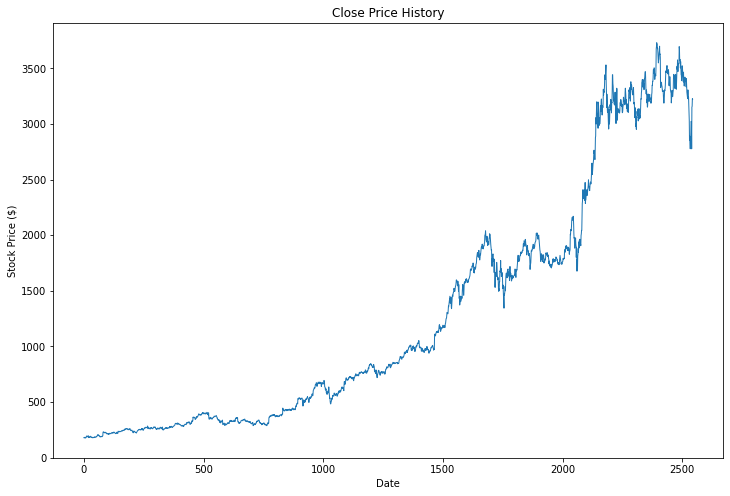

In [8]:
plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df['Close'], lw=1)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [9]:
data=df.filter(['Close'])

4. Prepare the data

In [10]:
#convert to numpy aarray
#We use 80 of the data for training
train_pct=0.8  
dataset=data.values
train_data_len=math.ceil(len(dataset)*train_pct)

In [11]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

### The window we use is n_period as input

In [12]:
n_period=60
#training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)):
    x_train.append(train_data[i-n_period:i,0])
    y_train.append(train_data[i,0])
    


In [13]:
x_train[0:2]

[array([0.0008719 , 0.00044439, 0.00047251, 0.00187879, 0.0007397 ,
        0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
        0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
        0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
        0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
        0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
        0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
        0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
        0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
        0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
        0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
        0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609]),
 array([0.00044439, 0.00047251, 0.00187879, 0.0007397 , 0.00095908,
        0.00083533, 0.        , 0.00070033, 0.0016116 , 0.00379977,
        0.00520886, 0.00421884, 0.00285756, 0.

In [14]:
y_train[:1]

[0.00806642384526994]

In [15]:
#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [16]:
x_train.shape

(1976, 60)

In [17]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1976, 60, 1)

5. Train the model
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
loss function is chosen as mean_squared_error'

In [18]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
          

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

1976/1976 [==============================] - 23s 9ms/step - loss: 4.8142e-04


In [21]:
#Test
test_data=scaled_data[train_data_len-60:,:]
x_test=[]
y_test=dataset[train_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
               
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
x_test.shape

(508, 60, 1)

6. Prediction error

In [23]:
predictions=model.predict(x_test)

In [24]:
predictions=scaler.inverse_transform(predictions)

In [25]:
predictions.shape

(508, 1)

In [26]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

66.99360906482222

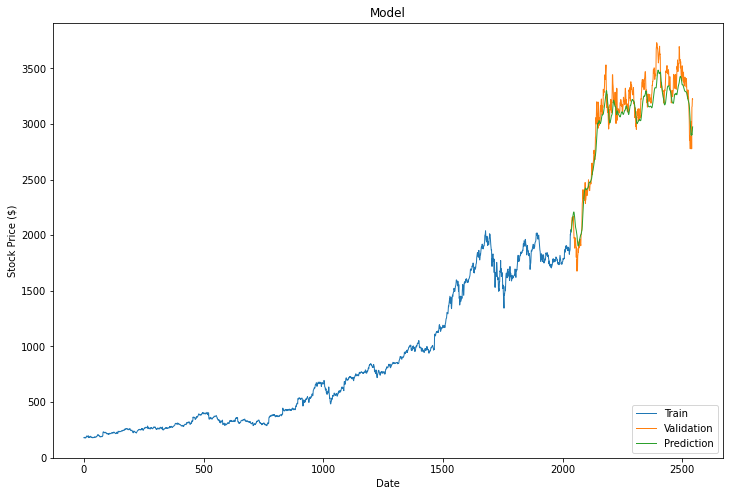

In [27]:
#plot the result
train=data[:train_data_len]
valid=data[train_data_len:]
valid=valid.assign(Predictions=predictions)
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.plot(train['Close'], lw=1)
plt.plot(valid[['Close','Predictions']], lw=1)
plt.legend(['Train','Validation', 'Prediction'],loc='lower right')
plt.show()

In [28]:
valid

,Close,Predictions
2036,2050.229980,2028.595703
2037,2079.280029,2048.742432
2038,2133.909912,2069.128418
2039,2150.800049,2092.344238
2040,2160.000000,2116.235352
...,...,...
2539,2776.909912,2911.076660
2540,3152.790039,2902.097168
2541,3158.709961,2917.661377
2542,3228.270020,2941.967529


In [29]:
#get the quote
stock_ticker = 'AMZN'
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-02-10']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
quote = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


In [30]:
quote

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2539,2022-02-03,2834.750000,2884.949951,2766.659912,2776.909912,2776.909912,11276600
2540,2022-02-04,3112.129883,3224.000000,3012.159912,3152.790039,3152.790039,12672800
2541,2022-02-07,3170.399902,3253.820068,3145.000000,3158.709961,3158.709961,5131200
2542,2022-02-08,3135.010010,3235.850098,3111.010010,3228.270020,3228.270020,3802000


In [31]:
quote_df=quote.filter(['Close'])

In [32]:
quote_df

,Close
0,179.029999
1,177.509995
2,177.610001
3,182.610001
4,178.559998
...,...
2539,2776.909912
2540,3152.790039
2541,3158.709961
2542,3228.270020


In [33]:
#last 60 days
last_60_days=quote_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)

In [34]:
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_price=model.predict(X_test)
predicted_prce=scaler.inverse_transform(predicted_price)
print(predicted_prce)

[[3007.066]]


In [89]:
stock_ticker = 'AMZN'
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-02-10']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
df.shape

(2544, 7)

### Group Assignment:
In the example, we use the last 60 day's price to predict the closing price for next day.  Modify the program to perform the following task:
- Use past 60 days price to predict the price in one week (5 days). You can choose any stock.
- Use your prediction to generate trading signals for the testing periodd (20% of you dataset):  if the predicted price is higher than the current price (you can specify a threshold) , you should buy one share; if it is lower than the current preice, you can short one share.
- Assume that you will always close your position in onw week, caculate your accumaltaed PnL for testing data


In [91]:
df[64:69]

,Date,Open,High,Low,Close,Adj Close,Volume
64,2012-04-04,196.949997,197.679993,192.360001,193.990005,193.990005,5456900
65,2012-04-05,193.550003,196.029999,193.550003,194.389999,194.389999,3217500
66,2012-04-09,192.020004,194.199997,190.500000,191.869995,191.869995,3135900
67,2012-04-10,192.750000,193.520004,186.570007,186.979996,186.979996,4455000
68,2012-04-11,189.630005,191.970001,186.789993,187.970001,187.970001,4337800


In [117]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900


In [116]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2539,2022-02-03,2834.750000,2884.949951,2766.659912,2776.909912,2776.909912,11276600
2540,2022-02-04,3112.129883,3224.000000,3012.159912,3152.790039,3152.790039,12672800
2541,2022-02-07,3170.399902,3253.820068,3145.000000,3158.709961,3158.709961,5131200
2542,2022-02-08,3135.010010,3235.850098,3111.010010,3228.270020,3228.270020,3802000
2543,2022-02-09,3257.469971,3276.689941,3205.000000,3223.790039,3223.790039,3439300


Text(0, 0.5, 'Stock Price ($)')

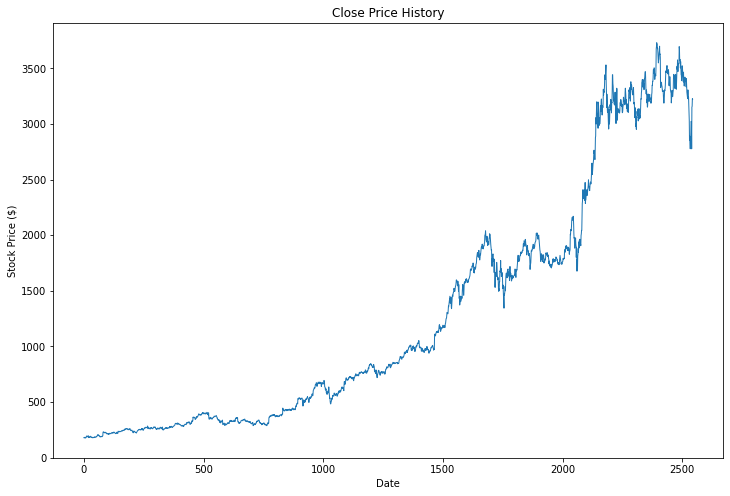

In [92]:
plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df['Close'], lw=1)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [93]:
data=df.filter(['Close'])

In [94]:
#convert to numpy aarray
#We use 80 of the data for training
train_pct=0.8  
dataset=data.values
train_data_len=math.ceil(len(dataset)*train_pct)

In [95]:
n_period=60
#training dataset
train_data=dataset[0:train_data_len]
x_train__try=[]
y_train_try=[]

for i in range(n_period, len(train_data)-4):
    x_train__try.append(train_data[i-n_period:i,0])
    y_train_try.append(train_data[i+4,0])
    


In [96]:
y_train_try[:5]

[193.990005, 194.389999, 191.869995, 186.979996, 187.970001]

In [118]:
y_train_try[-5:]

[1870.680054, 2008.719971, 2004.199951, 2049.669922, 2039.869995]

In [97]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [98]:
n_period=60
#training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)-5):
    x_train.append(train_data[i-n_period:i,0])
    y_train.append(train_data[i+4,0])
    


In [99]:
x_train[0:2]

[array([0.0008719 , 0.00044439, 0.00047251, 0.00187879, 0.0007397 ,
        0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
        0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
        0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
        0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
        0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
        0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
        0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
        0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
        0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
        0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
        0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609]),
 array([0.00044439, 0.00047251, 0.00187879, 0.0007397 , 0.00095908,
        0.00083533, 0.        , 0.00070033, 0.0016116 , 0.00379977,
        0.00520886, 0.00421884, 0.00285756, 0.

In [100]:
y_train[:1]

[0.005079486429803687]

In [101]:
#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [102]:
x_train.shape

(1971, 60)

In [103]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1971, 60, 1)

In [104]:
y_train.shape

(1971,)

In [105]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
          

In [106]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [107]:
model.fit(x_train,y_train, batch_size=1, epochs=3)

Epoch 1/3
1971/1971 [==============================] - 18s 7ms/step - loss: 7.4483e-04
Epoch 2/3
1971/1971 [==============================] - 14s 7ms/step - loss: 3.9288e-04
Epoch 3/3
1971/1971 [==============================] - 14s 7ms/step - loss: 3.3444e-04


In [108]:
#Test
test_data=scaled_data[train_data_len-60:,:]
x_test=[]
y_test=dataset[train_data_len+4:,:]

for i in range(60, len(test_data)-4):
    x_test.append(test_data[i-60:i,0])
    
               
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [109]:
x_test.shape

(504, 60, 1)

In [110]:
y_test.shape

(504, 1)

In [111]:
predictions=model.predict(x_test)

In [112]:
predictions=scaler.inverse_transform(predictions)

In [113]:
predictions.shape

(504, 1)

In [114]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

64.8407156563275

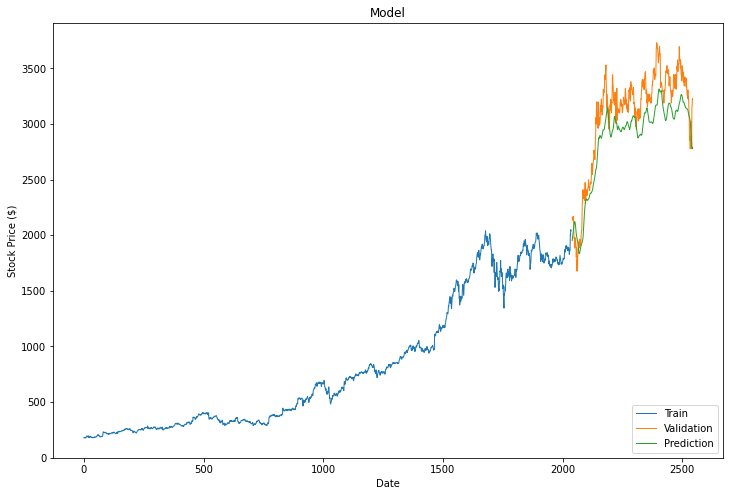

In [61]:
#plot the result
train=data[:train_data_len]
valid=data[train_data_len+4:]
valid=valid.assign(Predictions=predictions)
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.plot(train['Close'], lw=1)
plt.plot(valid[['Close','Predictions']], lw=1)
plt.legend(['Train','Validation', 'Prediction'],loc='lower right')
plt.show()

In [62]:
valid

,Close,Predictions
2040,2160.000000,1952.062622
2041,2149.870117,1971.237671
2042,2134.870117,1990.561401
2043,2155.669922,2012.545898
2044,2170.219971,2035.158325
...,...,...
2539,2776.909912,2808.750977
2540,3152.790039,2785.337158
2541,3158.709961,2778.350586
2542,3228.270020,2782.234131


In [121]:
df[:train_data_len]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2031,2020-01-30,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400
2032,2020-01-31,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300
2033,2020-02-03,2010.599976,2048.500000,2000.250000,2004.199951,2004.199951,5891700
2034,2020-02-04,2029.880005,2059.800049,2015.369995,2049.669922,2049.669922,5289300


In [123]:
valid.index[0]

2040

In [126]:
valid.index[-1]

2543

In [132]:
start = valid.index[0]

In [140]:
profit = []
for index in range(start,valid.index[-1]+1):
  sum = 0
  for _ in range(5):
     sum += valid['Predictions'][index] - df['Close'][index-5]
   
  profit.append(sum)

max(profit)


1101.4984148437497

In [141]:
len(profit)

504

# As we can say from above that the maximum profit for a 5 day period is $ 1101.